In [21]:
# Esto es para cargar todas las librerias

from ctypes.wintypes import SIZE
import PySimpleGUI as sg
import pandas as pd
from datetime import date
from datetime import datetime
from win32com import client

import openpyxl
from openpyxl import load_workbook
from openpyxl.styles import Font
from openpyxl.chart import BarChart, Reference
import string

from openpyxl.styles import PatternFill, GradientFill
from openpyxl.utils import get_column_letter

from openpyxl import Workbook
from openpyxl.styles import Border, Side

from openpyxl.styles import Alignment
import numpy as np
import sys

import PySimpleGUI as sg
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

import PySimpleGUI as sg
import io
import PIL.Image

In [22]:
# Este es el menu derecho que muestra todos los botones para los diferentes modulos

h=5
menubotones= [

    [sg.Button("Sistema de Contabilidad", size=(30,h),pad=(0,0),expand_y=True)],
    [sg.Button("Prónostico de Ventas", size=(30,h),pad=(0,0),expand_y=True, disabled=True)],
    [sg.Button("Manejo de Inventarios", size=(30,h),pad=(0,0),expand_y=True, disabled=True)],
    [sg.Button("Facturación", size=(30,h),pad=(0,0),expand_y=True, disabled=True)],
    [sg.Button("Manejo de Planilla", size=(30,h),pad=(0,0),expand_y=True, disabled=True)],
    [sg.Button("Analísis Financiero", size=(30,h),pad=(0,0),expand_y=True, disabled=True)],
    [sg.Button("Cuentas por pagar y cobrar", size=(30,h),pad=(0,0),expand_y=True, disabled=True)],
    [sg.Button("Ajustes", size=(14,h),pad=(1,0)), sg.Button("Salir", size=(14,h))]

]

In [23]:
# Esto es para generar una parte del layout


InventarioHistorico = pd.read_csv(r'C:\Users\XPC\Desktop\software-financiero\InventarioHistorico.csv', encoding='latin-1')

inventarioSA = InventarioHistorico.values.tolist()
inventarioSA_heads = ['Fecha','Código', 'Producto', 'Precio Unitario', 'Costo unitario', 'Movimiento']
inventarioSA_width = [9,12, 40, 11,0,8]
        
InventarioSuperiorA= [

        [sg.Text("Fecha  ", size=(10,1)),sg.Text("Codigo de barra #",size=(20,1)),sg.Text("Producto")],
        [sg.Input(date.today().strftime("%b-%d-%Y"), size=(12,1), key="-FECHA-", disabled=True),sg.Input("", size=(22,1),key="-CODIGO-"),sg.Input("", size=(61,None),key="-PRODUCTO-"),sg.Button("", size=(3,1),key="-AGREGARFOTO-")],
        [sg.Text("Cantidad"),sg.Input("", size=(7,None),key="-CANTIDAD-"),sg.Text("Costo Unitario"),sg.Input("", size=(13,None), key="-COSTO-"),sg.Text("Precio de venta unitario"),sg.Input("", size=(13,None), key="-PRECIOVENTA-"),sg.Radio('Contado', "RADIO1",key="-CONTADO-", default=True),sg.Radio('Crédito', "RADIO1",key="-CREDITO-")],
        [sg.Text("Proveedor"),sg.Input("",size=(51,2), key="-PROVEEDOR-", enable_events=True),sg.Text("Correo electronico "),sg.Input("", size=(24,2), key="-EMAILPROVEEDOR-", enable_events=True)],
        [sg.Button("Registrar entrada", size=(44,2),key="-REGISTRARENTRADA-"),sg.Button("Eliminar entrada", size=(45,2),key="-ELIMINARENTRADA-")],
        [sg.Text("Buscar por nombre o codigo"),sg.Input("",expand_x=True, key="-FILTRARINVENTARIO-", enable_events=True),sg.Button("Disponible", size=(9,1),key="-VISUALIZARINVENTARIO-")],
        [sg.Table(values=inventarioSA, enable_events=True, headings=inventarioSA_heads,max_col_width=65,col_widths=inventarioSA_width,auto_size_columns=False,justification='left',num_rows=8,background_color="White", row_height=22,text_color="black", key="-INVENTARIOHISTORICO-")],


]
 

#url = 'https://raw.githubusercontent.com/jchavesmartinez/software-financiero/main/cuentas%20-%20Copy.csv'
totalcuentas = pd.read_csv(r'C:\Users\XPC\Desktop\software-financiero\cuentas - Copy.csv')
totalcuentas=totalcuentas.drop(['Nivel', 'Primer Nivel'], axis=1)

registrodataSB=totalcuentas
registrodataSB_heads = ['Cedula', 'Cliente']
registrodataSB=registrodataSB.values.tolist()
registrodataSB_width = [12, 50]

InventarioSuperiorB= [
    [sg.Text("Nombre cliente"),sg.Input("",size=(36,2), key="-NOMBRECLIENTE-", enable_events=True),sg.Text("Cedula cliente"),sg.Input("",size=(15,2), key="-FILTRARCUENTAS-", enable_events=True)],
    [sg.Text("Correo electronico"),sg.Input("",size=(36,2), key="-CORREOCLIENTE-", enable_events=True),sg.Text("Celular "),sg.Input("",size=(18,2), key="-CELULARCLIENTE-", enable_events=True)],
    [sg.Table(values=registrodataSB, headings=registrodataSB_heads,max_col_width=65,col_widths=registrodataSB_width,auto_size_columns=False,justification='left',num_rows=3,background_color="White", row_height=25,text_color="black", key="-CUENTAS-", enable_events=True,select_mode=sg.TABLE_SELECT_MODE_BROWSE)],
    [sg.Text("Codigo de barras"),sg.Input("",size=(18,2), key="-CODIGOSALIDA-", enable_events=True),sg.Text("Producto"),sg.Input("",size=(36,2), key="-PRODUCTOSALIDA-", enable_events=True)],
    [sg.Text("Cantidad"),sg.Input("", size=(5,None),key="-CANTIDAD-"),sg.Text("Precio de venta"),sg.Input("", size=(13,None), key="-PRECIOVENTA-"),sg.Radio('Contado', "RADIO2",key="-CONTADO-", default=True),sg.Radio('Crédito', "RADIO2",key="-CREDITO-"),sg.Radio('Devolucion', "RADIO2",key="-DEVOLUCION-")],
    [sg.Text("Clave factura"),sg.Input("",size=(69,2), key="-CLAVEFACTURA-", enable_events=True)],
    [sg.Table(values=registrodataSB, headings=registrodataSB_heads,max_col_width=65,col_widths=registrodataSB_width,auto_size_columns=False,justification='left',num_rows=3,background_color="White", row_height=25,text_color="black", key="-CUENTAS-", enable_events=True,select_mode=sg.TABLE_SELECT_MODE_BROWSE)],
    [sg.Button("Registrar salida", size=(71,2), key="-REGISTROSALIDA-")]

]

In [24]:
# Esta funcion cambia el titulo de las tablas

def update_title(table, headings):
    for cid, text in zip(inventarioSA_heads, headings):
        table.heading(cid, text=text)

def update_width(table,anchos):
    for cid, width in zip(inventarioSA_heads, anchos):    # Set width for each column
        table.column(cid, width=width)

In [25]:
# funcion para cambiar tamaño de la imagen

def convToBytes(image, resize=(200,200)):
	
	img = image.copy()	
	cur_width, cur_height = img.size
	if resize:
		new_width, new_height = resize
		scale = min(new_height/cur_height, new_width/cur_width)
		img = img.resize((int(cur_width*scale), int(cur_height*scale)), PIL.Image.ANTIALIAS)	
	ImgBytes = io.BytesIO()
	img.save(ImgBytes, format="PNG")
	del img
	return ImgBytes.getvalue()

In [26]:
# esto es para generar los graficos

Graficos= [
    [sg.Image(r'C:\Users\XPC\Desktop\software-financiero\FEL220337.png',size=(200, 200),key='-PRODUCTOFOTO-'),sg.Canvas(key='-DEMANDA-',pad=(0,0)),sg.Canvas(key='-CYBGRAFICO-',pad=(0,0))],
    

]


In [27]:
# Esto consolida todas las partes de la intefaz en un  solo layout

menucompleto = [
    [sg.Frame("", [[sg.Frame("", InventarioSuperiorA,border_width=0),sg.Frame("", InventarioSuperiorB,border_width=0)]],border_width=0, pad=(0,0))],
    [sg.Frame("", [[sg.Frame("", Graficos,border_width=0)]],border_width=0, pad=(0,0))],
]

menuprincipal = [[sg.Frame("", menubotones,border_width=0)]]

layout = [
    [sg.Frame("", menucompleto,border_width=0,expand_y=True),
     sg.Frame("", menuprincipal,border_width=0,expand_y=True)]
]

window= sg.Window("Manejo de inventarios",layout,finalize=True,icon=r'C:\Users\XPC\Desktop\software-financiero\favicon2.ico')


In [28]:
# Obtención del canvas
from turtle import color


canvas = window['-CYBGRAFICO-'].TKCanvas
figure = Figure(facecolor='#64778D',figsize=(4,4))
axes = figure.add_subplot()
figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
figure_canvas_agg.draw()
figure_canvas_agg.get_tk_widget().pack(side='bottom', fill='both', expand=1)

canvas2 = window['-DEMANDA-'].TKCanvas
figure2 = Figure(facecolor='#64778D',figsize=(11,4))
axes2 = figure2.add_subplot()
figure_canvas2_agg = FigureCanvasTkAgg(figure2, canvas2)
figure_canvas2_agg.draw()
figure_canvas2_agg.get_tk_widget().pack(side='bottom', fill='both', expand=1)

def costobeneificio():

    try:
        movimiento=[]

        for x in range(0, len(inventarioSA)):
            movimiento.append(inventarioSA[x][5])
            neto=sum(map(float, movimiento))

        valor=[]

        for x in range(0, len(inventarioSA)):
            valor.append(inventarioSA[x][6])
            valortotal=sum(map(float, valor))

        costo=[]

        for x in range(0, len(inventarioSA)):
            costo.append(inventarioSA[x][7])
            costototal=sum(map(float, costo))

        labels = ['G1']
        costoplot = [costototal/valortotal*100]
        valorplot = [((valortotal-costototal)/valortotal)*100]
        width = 0.5

        axes.cla()
        axes.bar(labels, costoplot, width, label='% Costo',color=['#1A263B', 'white'])
        axes.bar(labels, valorplot, width, bottom=costoplot,label='% Margen ganancia')
        axes.set_facecolor("#64778D") 
        axes.set_title('Margen de Ganancia Inventario',color="white")
        axes.legend(loc='center left', bbox_to_anchor=(0.45,0.8))
        axes.spines['top'].set_visible(False)
        axes.spines['right'].set_visible(False)
        axes.spines['bottom'].set_color('white')
        axes.spines['left'].set_color('white')
        axes.tick_params(axis='x', colors='white')
        axes.tick_params(axis='y', colors='white')
    except:
        sg.Popup('No existe registro')


def demandagrafico():
    Year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
    Unemployment_Rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]

    axes2.cla()
    axes2.plot(Year, Unemployment_Rate)
    #axes.title('Unemployment Rate Vs Year')
    #axes.xlabel('Year')
    #axes.ylabel('Unemployment Rate')  





In [29]:
# Esto es el codigo para ejecutar la interfaz

from faulthandler import disable


if len(inventarioSA)!=0: 
    costobeneificio()
    figure_canvas_agg.draw()

    demandagrafico()
    figure_canvas2_agg.draw()


while True:
    
    event, values = window.read()
    
    if event == sg.WIN_CLOSED:
        break

    if event == '-VISUALIZARINVENTARIO-' and window['-VISUALIZARINVENTARIO-'].get_text()=="Movimientos":
        window['-VISUALIZARINVENTARIO-'].update("Disponible")

        update_title(window['-INVENTARIOHISTORICO-'].Widget, ['Fecha','Código', 'Producto', 'Precio Unitario', 'Costo unitario', 'Movimiento'])
        update_width(window['-INVENTARIOHISTORICO-'].Widget, [83,103, 360, 100,0,80])
        window['-INVENTARIOHISTORICO-'].update(inventarioSA)

    else:
        if event == '-VISUALIZARINVENTARIO-' and window['-VISUALIZARINVENTARIO-'].get_text()=="Disponible":
            window['-VISUALIZARINVENTARIO-'].update("Movimientos")

            InventarioTotal = pd.read_csv(r'C:\Users\XPC\Desktop\software-financiero\InventarioHistorico.csv', encoding='latin-1')
            InventarioDisponiblePositive = InventarioTotal[InventarioTotal["Tipo"] == 'Entrada'] 
            InventarioDisponiblePositive = InventarioDisponiblePositive.groupby(['Código','Producto']).agg(Movimiento=('Movimiento','sum'), Precio= ('Precio Total','sum'), Costo= ('Costo Total','sum'),InventarioPromedio=('Costo Total','mean'))

            InventarioDisponibleNegative = InventarioTotal[InventarioTotal["Tipo"] == 'Salida'] 
            InventarioDisponibleNegative = InventarioDisponibleNegative.groupby(['Código','Producto']).agg(Movimiento=('Movimiento','sum'), Precio= ('Precio Total','sum'), Costo= ('Costo Total','sum'),InventarioPromedio=('Costo Total','mean'))

            InventarioFinal = pd.concat([InventarioDisponibleNegative, InventarioDisponiblePositive]).groupby(['Código','Producto'])['Movimiento','Precio','Costo'].sum()
            InventarioFinal["Inventario Promedio"] = InventarioDisponiblePositive["InventarioPromedio"]
            InventarioFinal["Rotacion Inventarios"] = 365/(abs(InventarioDisponibleNegative["Costo"])/InventarioDisponiblePositive["InventarioPromedio"])

            InventarioFinal=InventarioFinal.drop(['Precio'], axis=1)
            InventarioFinal=InventarioFinal.reset_index()
            InventarioFinal=InventarioFinal.values.tolist()

            update_title(window['-INVENTARIOHISTORICO-'].Widget, ['Código', 'Producto', 'En stock', 'Costo Total',"Stock Prom.",'Rotación (días)'])
            update_width(window['-INVENTARIOHISTORICO-'].Widget, [123, 300, 60, 72, 76, 92])
            window['-INVENTARIOHISTORICO-'].update(InventarioFinal)
      
        

        
    if event == '-FILTRARINVENTARIO-' and values['-FILTRARINVENTARIO-']: 

        filtrarcuentas=InventarioHistorico.applymap(str)
        filtro=filtrarcuentas[filtrarcuentas.stack().str.contains(values['-FILTRARINVENTARIO-']).any(level=0)].values.tolist()
        window['-INVENTARIOHISTORICO-'].update(filtro)
        inventarioSA=filtro

        window['-REGISTRARENTRADA-'].update(disabled=True)
        
        try:
            window['-PRODUCTOFOTO-'].update(convToBytes(PIL.Image.open(r'C:\Users\XPC\Desktop\software-financiero\FEL220337.png')))
        except:
            sg.Popup('No existe foto para este producto')
        window['-VISUALIZARINVENTARIO-'].update("Disponible")
        costobeneificio()
        figure_canvas_agg.draw()
           
    if event == '-FILTRARINVENTARIO-' and values['-FILTRARINVENTARIO-']=="":
        window['-INVENTARIOHISTORICO-'].update(InventarioHistorico.values.tolist())
        inventarioSA=InventarioHistorico.values.tolist()
        movimiento=[]
        window['-VISUALIZARINVENTARIO-'].update("Disponible")

        costobeneificio()
        figure_canvas_agg.draw()
        window['-REGISTRARENTRADA-'].update(disabled=False)

        try:
            window['-PRODUCTOFOTO-'].update(convToBytes(PIL.Image.open(r'C:\Users\XPC\Desktop\software-financiero\NoImage.png')))
        except:
            sg.Popup('No existe foto para este producto')

    try:
        if event == '-REGISTRARENTRADA-':
            if float(values['-CANTIDAD-'])>0 and float(values['-PRECIOVENTA-'])>0 and float(values['-COSTO-'])>0 and values['-CODIGO-'] and values['-PRODUCTO-']:
                nuevoinventario=[values['-FECHA-'],values['-CODIGO-'],values['-PRODUCTO-'],values['-PRECIOVENTA-'],values['-COSTO-'],values['-CANTIDAD-'],float(values['-CANTIDAD-'])*float(values['-PRECIOVENTA-']),float(values['-CANTIDAD-'])*float(values['-COSTO-']),"Entrada"]
                inventarioSA.append(nuevoinventario)
                window['-INVENTARIOHISTORICO-'].update(inventarioSA)
                window['-INVENTARIOHISTORICO-'].set_vscroll_position(1)

                costobeneificio()
                figure_canvas_agg.draw()

                pd.DataFrame(inventarioSA, columns = ['Fecha','Código', 'Producto', 'Precio Unitario', 'Costo unitario', 'Movimiento', 'Precio Total', 'Costo Total', 'Tipo']).to_csv(r'C:\Users\XPC\Desktop\software-financiero\InventarioHistorico.csv', index=False, encoding='latin-1')

            else:  
                sg.Popup('No es una entrada validas')
                
    except:
        sg.Popup('No es una entrada valida')

    if event == '-ELIMINARENTRADA-':
        indexes = values['-INVENTARIOHISTORICO-']
        if indexes:
            for index in sorted(indexes, reverse=True):
                del inventarioSA[index]
            window['-INVENTARIOHISTORICO-'].update(inventarioSA)
            pd.DataFrame(inventarioSA, columns = ['Fecha','Código', 'Producto', 'Precio Unitario', 'Costo unitario', 'Movimiento', 'Precio Total', 'Costo Total', 'Tipo']).to_csv(r'C:\Users\XPC\Desktop\software-financiero\InventarioHistorico.csv', index=False, encoding='latin-1')
            costobeneificio()
            figure_canvas_agg.draw()

    if event == '-INVENTARIOHISTORICO-' and values['-INVENTARIOHISTORICO-']:
        
        data_selected = [inventarioSA[row] for row in values[event]]
        window['-CODIGO-'].update(data_selected[0][1])
        window['-PRODUCTO-'].update(data_selected[0][2])
        window['-COSTO-'].update(data_selected[0][4])
        window['-PRECIOVENTA-'].update(data_selected[0][3])

    if event == '-AGREGARFOTO-':
        if values['-CODIGO-']:
            foldername = sg.popup_get_file('Test', no_window=True, show_hidden=False, file_types=(("Images", "*.png *.gif *.bmp *.jpg *.jpeg"),))
        else:
            sg.Popup('Agregue antes un código de producto')


window.close()





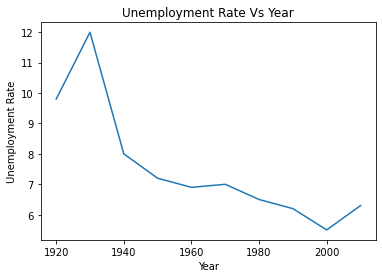

In [30]:
Year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
Unemployment_Rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
  
plt.plot(Year, Unemployment_Rate)
plt.title('Unemployment Rate Vs Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()